# <center>Digital Image Processing - Problem Set 5</center>

### Student Names: Catherine Díaz & Sorelys Sandoval

In [8]:
# Import all the libraries needed
from os import listdir, path
import cv2
import numpy as np
import math
import json
import matplotlib.pyplot as plt
%matplotlib inline
# Get all the filenames in the folder images
filenames = listdir('images')
filen = listdir('im')
filename = listdir('cars')

### Problem 1

Write a function that describes <i>each</i> object in a binary image using the Hu statistical moments. The Hu moments are invariant to rotation, scale and translation. These moments can be defined for <i>each</i> region in a binary image. The OpenCV function to compute these moments is <tt>cv2.HuMoments</tt>. Write down the equations that compute the seven Hu moments for a region.

17 objetos en total
(1, array([[  2.28516566e-01],
       [  1.51622505e-02],
       [  5.96665390e-03],
       [  5.40948254e-04],
       [  6.85106641e-07],
       [  3.28556348e-05],
       [ -6.89289716e-07]]))
(2, array([[  3.17013085e-01],
       [  6.36120231e-02],
       [  8.90898720e-03],
       [  1.53855917e-03],
       [  3.75848984e-06],
       [  1.21466674e-04],
       [ -4.28024355e-06]]))
(3, array([[  1.99008905e-01],
       [  1.19945861e-02],
       [  1.20201210e-27],
       [  1.93115646e-27],
       [  2.80774704e-54],
       [  1.75276435e-28],
       [ -8.79450435e-55]]))
(4, array([[  1.66666667e-01],
       [  3.31013624e-28],
       [  1.21865554e-24],
       [  9.78172683e-25],
       [  1.06054885e-48],
       [  1.42417596e-38],
       [ -1.25781086e-49]]))
(5, array([[ 0.17468087],
       [ 0.00273563],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ]]))
(6, array([[  1.69595887e-01],
       [ 

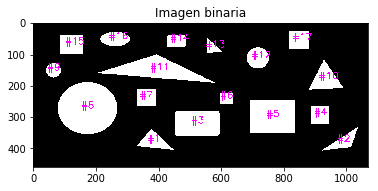

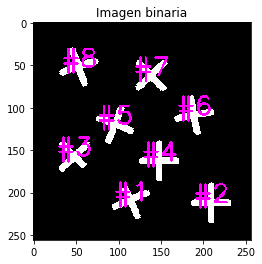

In [43]:
def HuMoments(image):
    """ Función que describe los momentos estadisticos Hu de cada objeto en una imagen binaria.
    Input:      image: numpy array con la imagen (binaria).
    ====== 
    
    Output:       out: arreglo con los 7 momentos Hu por cada objeto hallado.
    ======  image_out: numpy array con la imagen original y los objetos numerados.
    """
    image_out = cv2.cvtColor(image,cv2.COLOR_GRAY2BGR)
    _,contours,_ = cv2.findContours(image.copy(),1,2)
    print(str(len(contours))+' objetos en total')
    out = []
    for i,cnt in enumerate(contours):
        M = cv2.moments(cnt)
        out.append(cv2.HuMoments(M))
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        cv2.putText(image_out, "#{}".format(i+1), (cX-20, cY), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 0, 255), 2)
    return out, image_out

names = ["shapes.PNG","crosses.png"]
for name in names:
    img = cv2.imread("images/"+name,0)
    
    # Get binary image
    T0 = (np.max(img)+np.min(img))/2.0
    _, img_th = cv2.threshold(img, T0, 255, cv2.THRESH_BINARY)
    
    # Call the function
    huM, img2 = HuMoments(img_th)
    
    # Print the Hu moments of each object
    for i,hu in enumerate(huM):
        print(i+1,hu)
    
    plt.figure(); plt.imshow(img2); plt.title("Imagen binaria")

<p><em><strong>Funcionalidad y descripción del código:</strong></em> Una imagen es leída y binarizada para ser ingresada a la función HuMoments() de donde se obtendrán los momentos Hu de cada objeto de la imagen y la imagen con cada objeto numerado (esta última solo con fines de visualización). Esto se repite para cada imagen en una lista previamente definida.</p>
    
<p>Para conseguirlo se obtienen los contornos de la imagen binaria (usando <strong>cv2.findContours()</strong>) y se itera sobre cada contorno hallado, lo cual corresponde a cada objeto o región en la imagen. Dentro de dicho ciclo se calculan los momentos de cada región usando la función <strong>cv2.moments()</strong> y luego la salida de esta última se ingresa a <strong>cv2.HuMoments()</strong> [1], función que calcula los momentos de Hu para la región actual usando las ecuaciones a continuación:
</p>
$ hu_1 = n_{20} + n_{02} $ <br>
$ hu_2 = (n_{20} - n_{02})^2 + 4n_{11}^2 $ <br>
$ hu_3 = (n_{30} - n_{12})^2 + (n_{21} - n_{03})^2  $ <br>
$ hu_4 = (n_{30} + n_{12})^2 + (n_{21} + n_{03})^2  $ <br>
$ hu_5 = (n_{30} - 3n_{12})(n_{30} + n_{12})[(n_{30} + n_{12})^2 - 3(n_{21} + n_{03})^2] + (3n_{21} - n_{03})(n_{21} + n_{03})(3(n_{30} + n_{12})^2 - (n_{21} + n_{03})^2)  $ <br>
$ hu_6 = (n_{20} - n_{02})[(n_{30} + n_{12})^2 - (n_{21} + n_{03})^2] + 4n_{11}(n_{30} + n_{12})(n_{21} + n_{03}) $ <br>
$ hu_7 = (3n_{21} - n_{03})(n_{30} + n_{12})[(n_{30} + n_{12})^2 - 3(n_{21} + n_{03})^2] - (n_{30} - 3n_{12})(n_{21} + n_{03})(3(n_{30} + n_{12})^2 - (n_{21} + n_{03})^2)  $ <br><br>

Para visualización también se le dibuja el número correspondiente al objeto en el centroide del contorno.<br>

<p><strong><em>Análisis:</em></strong> En los resultados se grafica la imagen con cada región numerada y se muestran los momentos Hu de cada objeto para cada imagen usada. La primera imagen tiene 17 objetos dentro y la segunda posee 8 objetos. Basandonos en la definición de estos momentos [2] debido a que son invariantes en escala y rotación entonces los objetos semejantes tenderán a tener momentos Hu parecidos. Esto se comprueba con los objetos 5, 9 y 17 en la primera imagen ya que presentan momentos parecidos porque efectivamente son circulos pero a distinta escala. La segunda imagen evidencia la invarianza a la rotación pero en algunos grupos de cruces como por ejemplo las cruces 5, 7 y 8.</p>

1. http://docs.opencv.org/2.4/modules/imgproc/doc/structural_analysis_and_shape_descriptors.html#cv2.HuMoments
2. https://en.wikipedia.org/wiki/Image_moment

### Problem 2

Write a function that detects corners on an image using the Harris corner detection method. You can use the OpenCV built-in functions. Your function should output the $N$ detected corner locations in a $2 \times N$ matrix. Visualize your results by plotting the corners on top of the input image.  Apply your function to the binary image <tt> shapes.png</tt> and to the grayscale image <tt>face.tif</tt>.

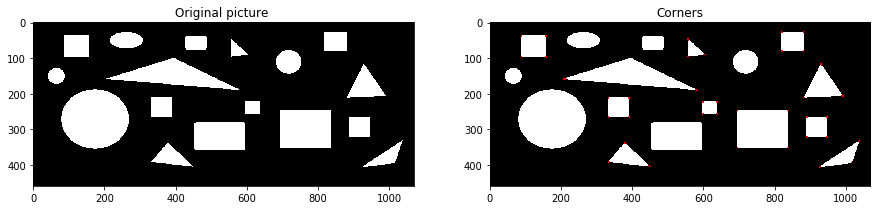

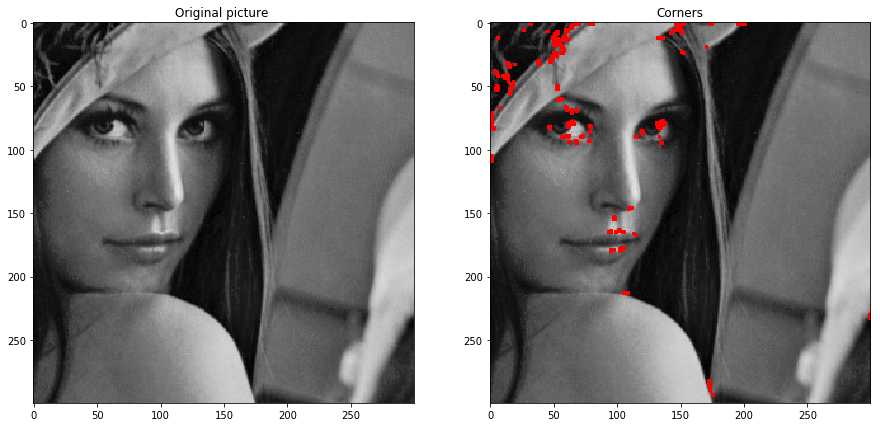

In [48]:
def Harris_corners(image):
    """ Función que detecta esquinas usando el método de detección de Harris.
    Input:  image: numpy array con la imagen (BGR).
    ====== 
    
    Output:   out: arreglo  de 2xN con las coordenadas de las esquinas
    ======  image: numpy array con la imagen original y las esquinas en rojo.
    """
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    dst = cv2.cornerHarris(gray,2,5,0.04)
    dst = cv2.dilate(dst,None)
    condition = dst>0.01*dst.max()
    out = np.argwhere(condition)
    image[condition] = [255,0,0]
    return  np.transpose(out), image

names = ["shapes.PNG","face.tif"]
for name in names:
    img = cv2.imread("images/"+name); #se deja BGR para poder sumarla con los circulos
    corners, img2 = Harris_corners(img.copy())

    plt.figure(figsize=(15,10));
    plt.subplot(1,2,1); plt.imshow(img,cmap = 'gray'); plt.title("Original picture ")
    plt.subplot(1,2,2); plt.imshow(img2); plt.title("Corners")    

<p><em><strong>Funcionalidad y descripción del código:</strong></em> Una imagen es leída e introducida a la función Harris_corners(). Primero es convertida a escala de grises y se obtienen los puntos donde se detectan esquinas usando el método de Harris y además se genera la imagen con cada esquina resaltada (esta última solo con fines de visualización). Esto se repite para cada imagen en una lista previamente definida.</p>

<p>Para conseguirlo se usa la función <strong>cv2.cornerHarris()</strong> [1] y luego la salida de esta última se dilata y se filtra para obtener los puntos más fuertes de la salida. El filtrado consiste en solo obtener los pixeles que mayores que un umbral pequeño cercano a 0. Los pixeles que cumplen la condición serán coloreados de rojo y sus indices se conservarán en una lista 2xN siento N el número de pixeles rojos.</p>
<p> Es importante resaltar que la función <strong>cv2.cornerHarris()</strong> lleva como parámetros la imagen a escala de grises, el tamaño de la vecindad considerada para la detección de las esquinas (escogimos 2 para tener bastante precisión), el tamaño del kernel para la operación sobel que realiza internamente (probando con diferentes valores escogimos ksize=5 puesto que arrojaba satisfactoriamente las esquinas rectas) y por últmo el parámetro k de la ecuación del método de Harris la cual dejamos como valor 0.04 como lo recomendaba la guía de opencv.</p>

<p><strong><em>Análisis:</em></strong> En los resultados se grafica la imagen original junto con la que muestra las esquinas detectadas. En la primera imagen se muestra que se detectan las esquinas fuertes o rectas y las redondeadas se omiten. Para el caso de la segunda imagen las esquinas no son tan evidentes como en la primera y se observa como el algoritmo presenta falsos positivos en algunas partes de la imagen, en donde la variación de intensidad en los pixeles hace que se confundan como bordes rectos, un ejemplo de esto se observa en el brillo de los labios. </p>

<p><strong><em>Algo curioso:</em></strong> Existe otra función de opencv que realiza la detección de esquinas usando el método de Shi-Tomasi o incluso el de Harris. Esta función ( <strong>cv2.goodFeaturesToTrack()</strong>)presenta una mejor salida porque arroja los mejores puntos considerados esquinas, con lo cual no es redundante como cv2.cornerHarris(). Sin embargo intentamos usarlo y mostrar las esquinas dibujando circulos centrados en dichos puntos, pero para el método de Harris no daba buenos resultados.</p>

1. http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html
2. http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_shi_tomasi/py_shi_tomasi.html

### Problem 3

A company that bottles a variety of industrial chemicals has heard
of your success solving imaging problems and hires you to design an approach
for detecting when bottles are not full. The bottles appear as shown below
as they move along a conveyor line past an automatic
filling and capping station. A bottle is considered imperfectly filled when the
level of the liquid is below the midway point between the bottom of the neck and
the shoulder of the bottle.The shoulder is defined as the region of the bottle
where the sides and slanted portion of the bottle intersect. The bottles are
moving, but the company has an imaging system equipped with an illumination
flash front end that effectively stops motion, so you will be given images that
look very close to the sample shown below.

<img src="files/images/bottles.png" />

Propose a solution for detecting
bottles that are not filled properly. State clearly all assumptions that you
make and that are likely to impact the solution you propose. Implement your
solution and apply it to the images <tt>bottles.tif, new_bottles.jpg</tt> and <tt> three_bottles.jpg</tt>. Visualize the results
of your algorithm by highlighting with false colors
the regions that are detected as correctly
filled bottles and the regions that are detected as not properly filled bottles.

5
5
5


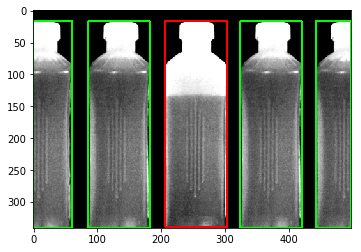

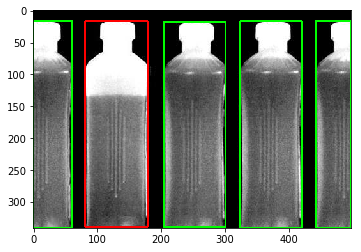

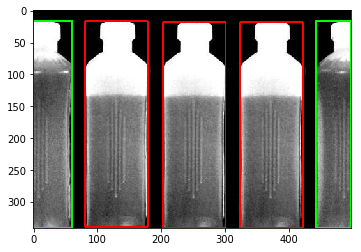

In [49]:
def adaptative_th(image, T0):
    """ Función que hace una umbralización adaptativa simple.
    Input:  image: numpy array con la imagen (escala de grises).
    ======    T0: parámetro de th inicial
    
    Output:   out: numpy array con la imagen transformada.
    ======
    """
    _, img_th = cv2.threshold(image, T0, 255, cv2.THRESH_BINARY) # 2
    u1 = np.mean(img_th*image); u2 = np.mean((255-img_th)*image) # 3
    T = (u1 + u2)/2                                              # 4
    if np.abs(T - T0) > 1e-12: # Error para iteración
        return adaptative_th(image, T)                           # 5
    else:
        _, out = cv2.threshold(image, T, 255, cv2.THRESH_BINARY)
        return out, T

names = ["bottles.png","new_bottles.jpg","three_bottles.jpg"]
for name in names:
    img = cv2.imread("images/"+name,0)
    
    # Segmentate each bottle
    img2,_ = adaptative_th(img,(np.max(img)+np.min(img))/2.0)
    filtered = cv2.medianBlur(img2,7)
    #edged = cv2.Canny(filtered.copy(), 250, 255)
    
    # Find the contours of each bottle
    _,contours,hierarchy = cv2.findContours(filtered.copy(), 1, 2)
    print(len(contours)) # Number of bottles detected
    empty = []
    out = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    
    # Sort the contours (left to right)
    boundingBoxes = [cv2.boundingRect(c) for c in contours]
    (contours, boundingBoxes) = zip(*sorted(zip(contours, boundingBoxes), key=lambda b:b[1][0], reverse=False))
    for i,cnt in enumerate(contours):
        # Delimit the box of the bottle
        rect = cv2.minAreaRect(cnt); box = cv2.boxPoints(rect); box = np.int0(box)
        a = box[1][1]; b = box[0][1]; c = box[0][0]; d = box[3][0];
        
        # Get the empty part of the bottle
        _,img3 = cv2.threshold(img[a:b,c:d],200,255,0)
        img4 = cv2.medianBlur(img3,5)
        
        # Set the region to check emptiness
        y1 = 65; y2 = 70; x1 = int(img4.shape[1]/2.0)-10; x2 = int(img4.shape[1]/2.0)+10;
        if (i==0): # If first bottle, set x axis from 0 to the middle
            x1 = 0; x2 = int(img4.shape[1]/2.0)
        elif (i==len(contours)-1): # If last bottle, set x axis from the middle to the last
            x1 = int(img4.shape[1]/2.0); x2 = img4.shape[1]
        
        # If mean(region) > 0, the bottle is empty -> Draw a red box
        if (np.mean(img4[y1:y2,x1:x2])>0):
            empty.append(box)
            cv2.drawContours(out,[box],0,(255,0,0),2)
        
        # If mean(region) < 0, the bottle is filled -> Draw a green box
        else:
            cv2.drawContours(out,[box],0,(0,255,0),2)
    plt.figure(); plt.imshow(out,cmap='gray')

<p><em><strong>Funcionalidad y descripción del código:</strong></em> Una imagen es leída e ingresada a la función adaptative_th de donde se obtendrá la imagen umbralizada con el método de umbralización adaptativo simple. Se filtra para obtener una segmentación completa de cada botella. Luego se hallan los contornos en la imagen, se organizan de izquierda a derecha y se itera sobre cada contorno hallado. Dentro del ciclo se determina la región rectangular que contiene al contorno hallado y se umbraliza la imagen original pero solo en esa región (es decir solo una botella). Esta imagen se filtra para segmentar completamente el liquido de la botella vacía. 
<br>Después dependiendo de la posición de la botella se determina la ventana a mirar si cumple el nivel de llenado. Si las botellas están en los extremos de la imagen (es decir incompletas) entonces la ventana se centra en x de tal forma que esté mayormente dentro de la botella y no del fondo. De lo contrario la ventana se centra en x en la mitad de región ya que la botella es bastante simétrica. La ventana estará posicionada entre los pixeles 65 y 70 en el eje y puesto que ahí tiende a estar el umbral de decisión de botella vacía o llena. Si el promedio de los es mayor que 0 entonces la botella se determina que está vacía y por lo tanto se grafica su caja delimitadora con color rojo. Si la condición es false entonces la botella se asume estar llena.

<p><strong><em>Asumpciones:</em></strong> </p>
1. Las botellas de los extremos siempre están recortadas a la mitad.
2. La escala de las imagenes es invariante (o tiene cambios infimos)
3. La tapa siempre es claramente segmentable del fondo. Casi que la tapa siempre sea representada por pixeles blancos.
4. Implicación de 2 y 3: El nivel de decisión estará siempre entre 65 y 70 pixeles por debajo de la tapa

<p><strong><em>Links usados:</em></strong></p>
1. http://docs.opencv.org/3.1.0/dd/d49/tutorial_py_contour_features.html
2. http://www.pyimagesearch.com/2015/04/20/sorting-contours-using-python-and-opencv/


### Problem 4

Suppose that you are observing objects in the night sky. Suppose that only ‘big’ objects are important to your observation. In this scenario, ‘small’ objects are considered noise. Write a python function that processes the image as follows:

1. Use a 15x15 averaging filter to blur the image.

2. Apply a threshold of 0.25 to binarize the resulting blurred image.

3. Use the binary image to ‘mask’ the noise of the original image: simply perform an element-wise multiplication of the binary image and the original image.

4. Use connected component analysis on the binary image to count the number of ‘big’ objects found.

The function should take three inputs: an image matrix, the size of the averaging filter and threshold value. Make sure your function displays the intermediary results of each step outlined above.

Apply your function to the input image ‘hubble-original.tif’. Try different values of smoothing kernel size and threshold value. Analyze the relationship between number of objects found and smoothing kernel size and threshold value. In particular, you might want to observe the result when using an averaging filter of size n=1 (i.e. no smoothing).

Para la imagen hubble-original.tif con k=1 y thr=0.25
El número de objetos grandes encontrados: 451
Para la imagen hubble-original.tif con k=1 y thr=0.5
El número de objetos grandes encontrados: 244
Para la imagen hubble-original.tif con k=1 y thr=0.75
El número de objetos grandes encontrados: 132
Para la imagen hubble-original.tif con k=15 y thr=0.25
El número de objetos grandes encontrados: 21
Para la imagen hubble-original.tif con k=15 y thr=0.5
El número de objetos grandes encontrados: 9
Para la imagen hubble-original.tif con k=15 y thr=0.75
El número de objetos grandes encontrados: 6
Para la imagen hubble-original.tif con k=25 y thr=0.25
El número de objetos grandes encontrados: 7
Para la imagen hubble-original.tif con k=25 y thr=0.5
El número de objetos grandes encontrados: 2
Para la imagen hubble-original.tif con k=25 y thr=0.75
El número de objetos grandes encontrados: 1
Para la imagen shapes.PNG con k=1 y thr=0.25
El número de objetos grandes encontrados: 17
Para la imagen sha

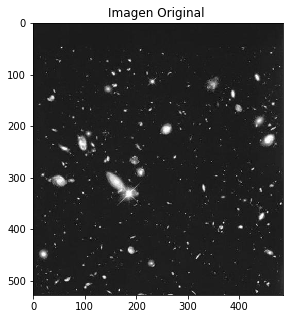

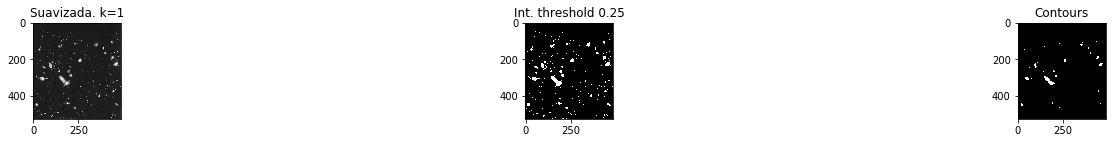

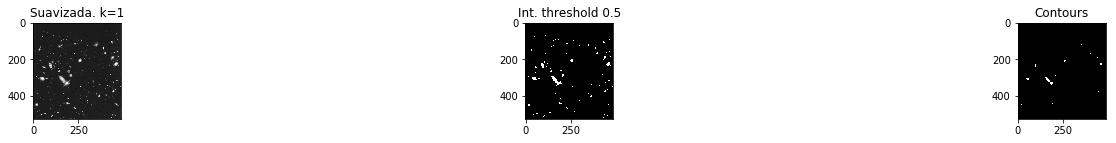

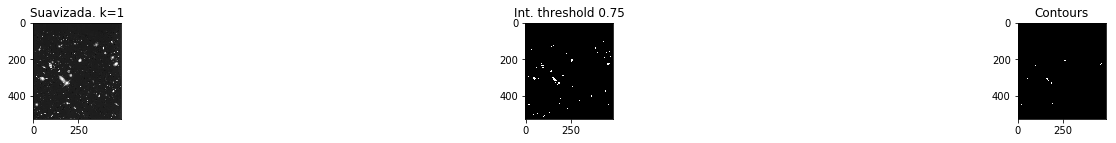

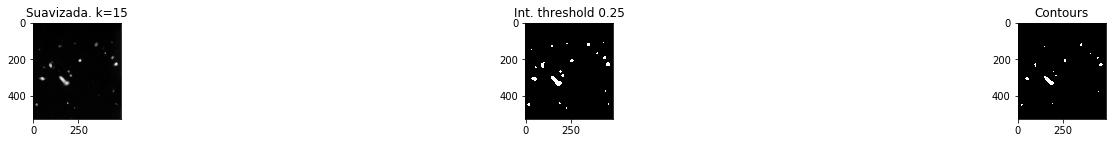

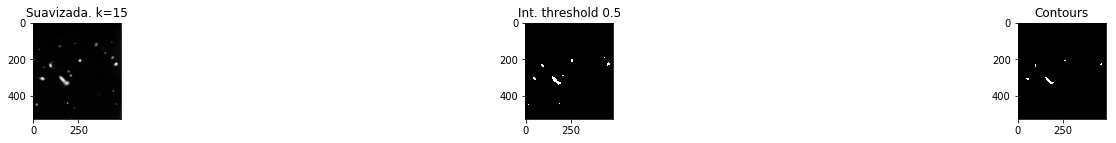

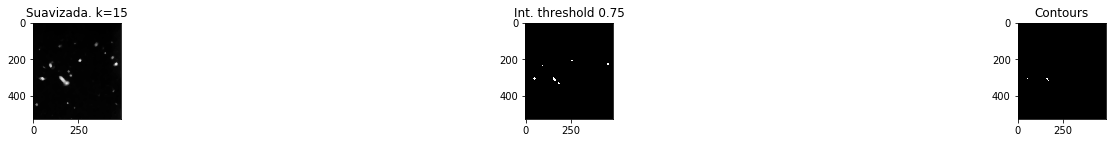

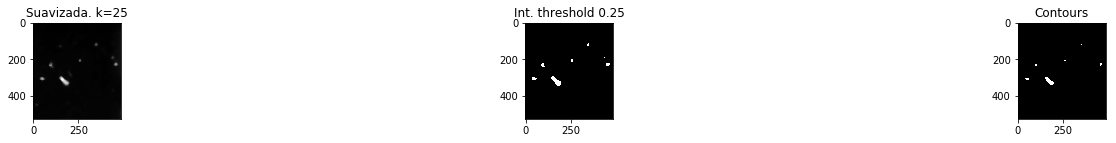

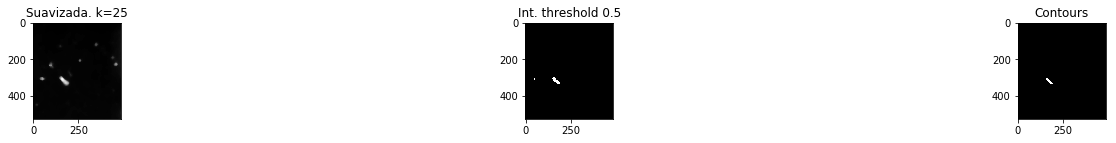

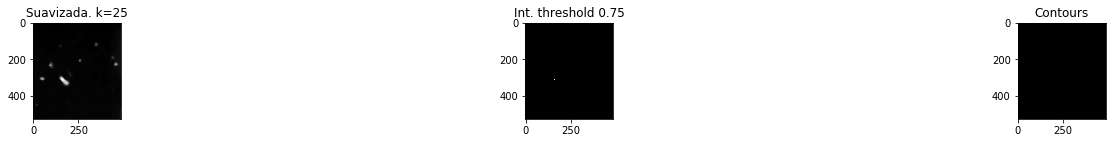

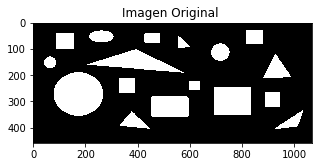

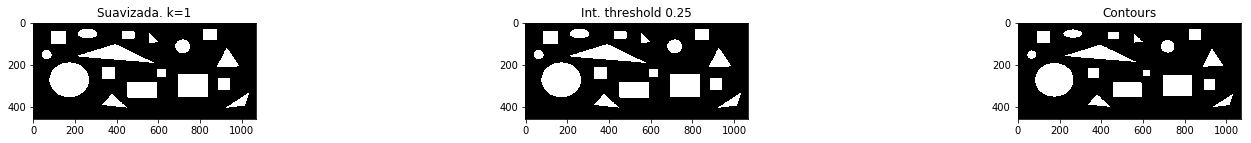

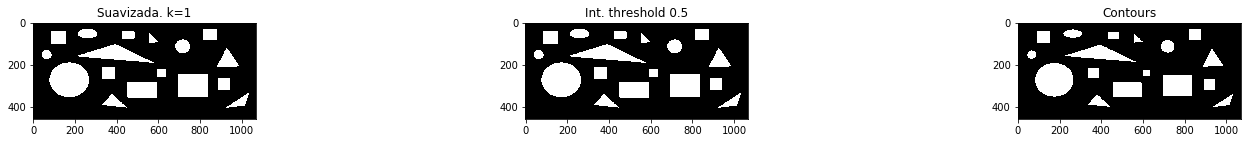

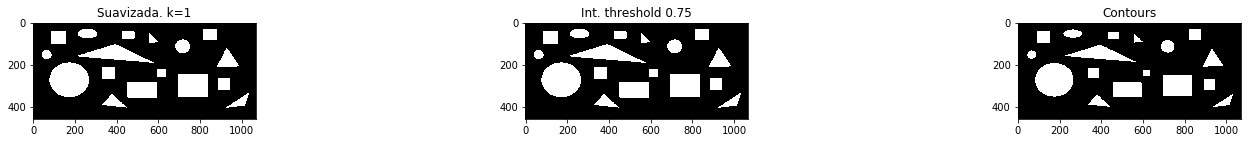

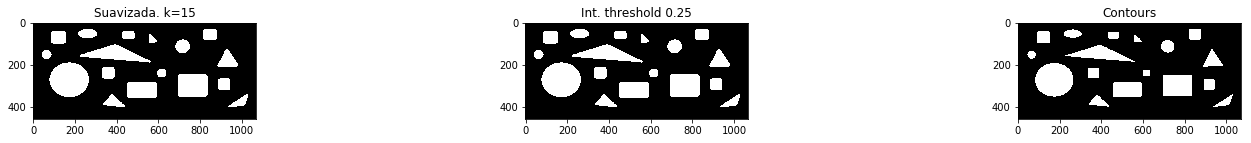

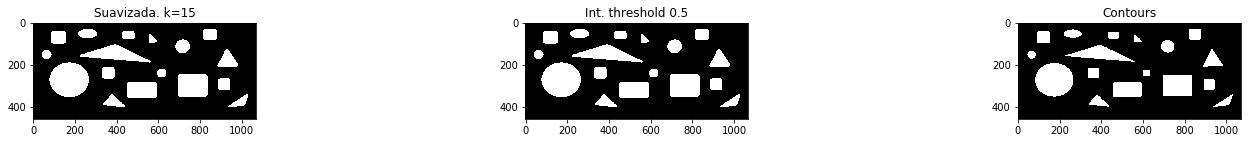

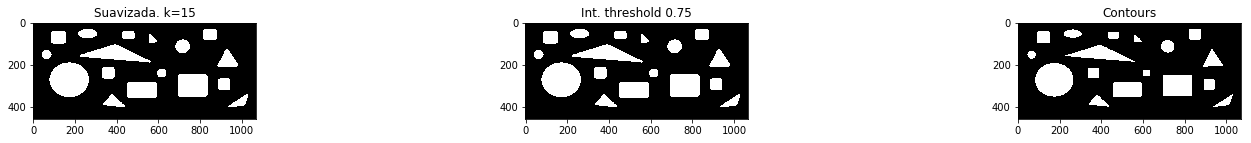

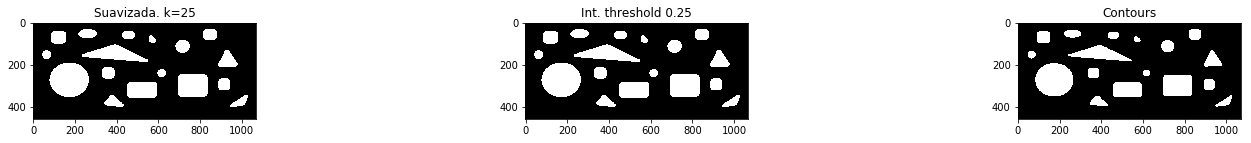

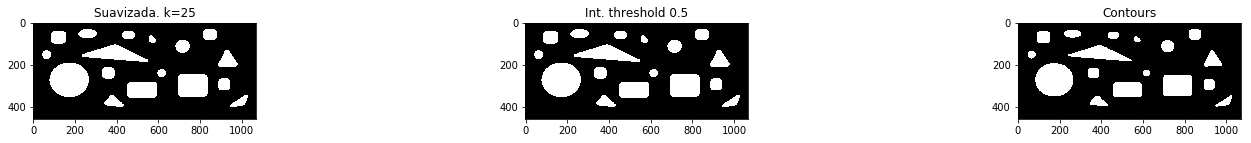

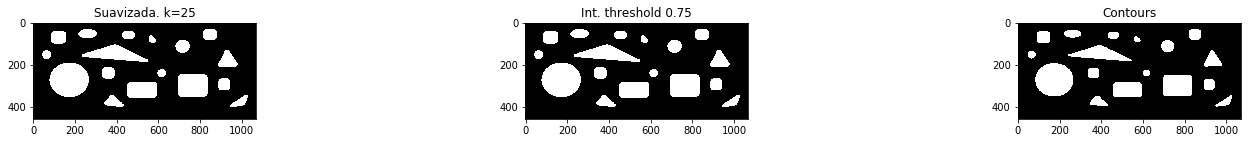

In [5]:
def big(image):
    c=1
    #Ciclos para probar varios kernels y thresholds
    for k in [1,15,25]:
        for thr in [0.25,0.5,0.75]:
            #Filtro de suavizado
            blurred=cv2.medianBlur(image,k)
            #Binarización de la imagen con threshold
            m,thres = cv2.threshold(blurred,thr*255,1,cv2.THRESH_BINARY)
        
            height, width = img.shape
            mult= np.zeros((height, width),  np.uint8)
            n=mult
            for i in range(height):
                for j in range(width):
                    #Multiplicacion de la imagen binaria con la imagen original
                    mult[i][j]=thres[i][j]*image[i][j]
            #Obtener contornos
            contours, hierarchy = cv2.findContours(mult, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
            cv2.drawContours(mult, contours, -1, (0,255,0), 3)
            #Obtener numero de contornos o objetos
            obj=len(contours)
            #Mostrar la información de kernel, threshold y numero de objetos obtenidos
            print('Para la imagen '+name+' con k='+str(k)+' y thr='+str(thr))
            print('El número de objetos grandes encontrados: ' + str(obj))
            

            plt.figure(figsize=(25,25))
            plt.subplot(12,3,c)    
            plt.title("Suavizada. k="+str(k)) 
            plt.imshow(blurred, cmap='gray')
            c=c+1
    
            plt.subplot(12,3,c)  
            plt.title("Int. threshold "+str(thr))
            plt.imshow(thres,cmap='gray')
            c=c+1
        
            plt.subplot(12,3,c)
            plt.title("Contours")
            plt.imshow(mult, cmap='gray')
            c=c+1

im = [] # List with all the images read
for i,name in enumerate(filen):
    img = cv2.imread("im/"+name,0);
    plt.figure(figsize=(5,5))
    plt.title("Imagen Original ")
    plt.imshow(img,cmap = 'gray')

    do=big(img)

<p>
    <em><strong>Funcionalidad del código: </strong></em>
    Un código toma especificaciones de threshold y tamaño de kernel para en una
    función, primero usar un filtro que promedia y suaviza que toma como primer
    argumento la imagen y como segundo argumento el tamaño del kernel. La
    imagen suavizada pasa por una binarización a partir de un threshold.
    Seguido de esto se lee cuanto mide la imagen tanto de ancho como de largo
    para poder recorrer cada pixel de la imagen y multiplicarlo con los pixeles
    del threshold. Se buscan los contornos, lo que además es útil para contar
    el número de objetos presentes en la imagen. Para causar la variación tanto
    del valor de threshold como del kernel, se usa un ciclo dentro de otro, de
esta forma se puede apreciar mejor como afecta cada uno la imagen.    <strong><em></em></strong>
</p>
<p>
    <em><strong>Funciones empleadas y descripción: </strong></em>
</p>
<p>
Se emplearon funciones ya conocidas como<strong>cv2.medianBlur(), </strong>que se encarga de suavizar la imagen, o    <strong>cv2.threshold()</strong> que es muy útil para binarizar imágenes
teniendo en cuenta un threshold especifico. También se empleó    <strong>img.shape </strong>La cual permite obtener las dimensiones de las
    imágenes.
</p>
<p>
    La función <strong>cv2.findContours() </strong>requiere como parámetros la
imagen a emplear, el modo (que en este caso se escogió    <strong>CV_RETR_TREE </strong>para que devolviera todos los valores de los
    contornos), el método como se aproximarán los contornos (que en este caso
    fue <strong>CV_CHAIN_APPROX_SIMPLE </strong>el cual comprime segmentos en
    todas las direcciones), la jerarquía entre otros, y así mismo tiene una
opción para conocer el número de objetos que es    <strong>len(contours),</strong> el cual sirve para detectar líneas. Este
    necesita como primer argumento una imagen a la cual se le hayan detectado
    los bordes. Sus otros dos argumentos más importantes son los dos últimos,
    los cuales son el largo mínimo de una línea para ser considerado y el
    espacio máximo entre segmentos para que se puedan considerar una sola
    línea.
</p>
<p>
    <strong><em>Para tener en cuenta:</em></strong>
    Como se esperaba en la segunda imagen siempre se detecta la misma cantidad
    de objetos sin importar tanto la variación del kernel como del valor del
    threshold, esto debido a que los objetos en este eran grandes. Por otro
    lado, en la primera imagen hay objetos de muchos tamaños por lo que al
    variar el tamaño del kernel o del threshold el número de objetos detectados
    varia significativamente.
</p>

### Problem 5

Write a function that extracts local interest points and computes
their descriptors using the SIFT transform. You can find implementations of
the SIFT transform in OpenCV.


Your function should return two matrices: A first matrix of size $3 \times N$, where $N$ is the number of detected points in the image, and the 3 elements correspond to the $x$, $y$ locations and $s$ size of the detected points. A second matrix of size $128 \times N$ that contains the SIFT descriptor of each interest point.

Apply your function to all car images <tt>image_00XX.jpg</tt>.
Store the results of each image in a separate data file.

Archivo de datos de carro 1 creado
Archivo de datos de carro 2 creado
Archivo de datos de carro 3 creado
Archivo de datos de carro 4 creado
Archivo de datos de carro 5 creado
Archivo de datos de carro 6 creado
Archivo de datos de carro 7 creado
Archivo de datos de carro 8 creado
Archivo de datos de carro 9 creado
Archivo de datos de carro 10 creado
Archivo de datos de carro 11 creado
Archivo de datos de carro 12 creado
Archivo de datos de carro 13 creado
Archivo de datos de carro 14 creado
Archivo de datos de carro 15 creado
Archivo de datos de carro 16 creado
Archivo de datos de carro 17 creado
Archivo de datos de carro 18 creado
Archivo de datos de carro 19 creado
Archivo de datos de carro 20 creado


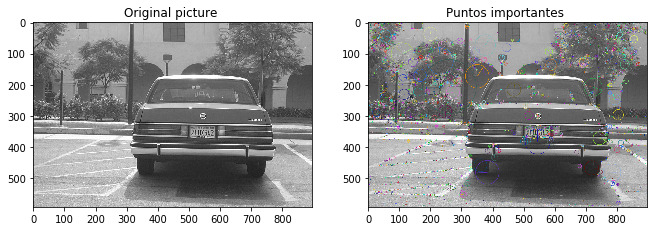

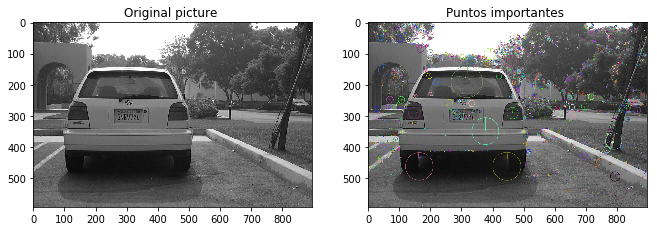

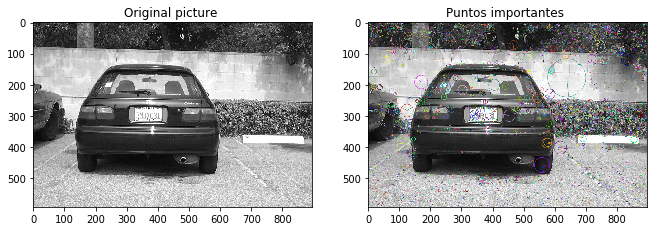

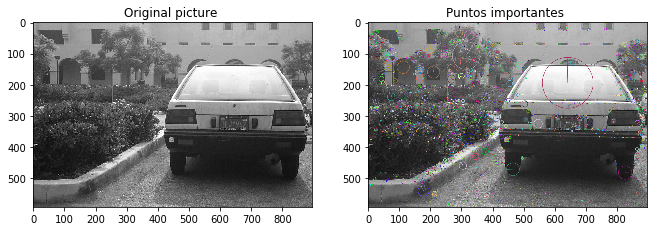

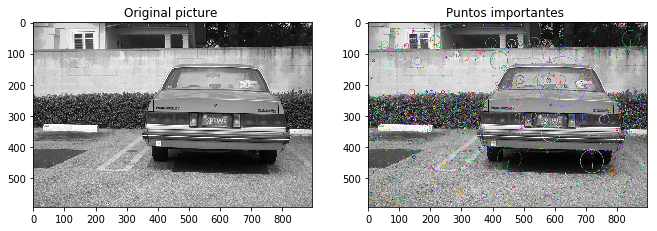

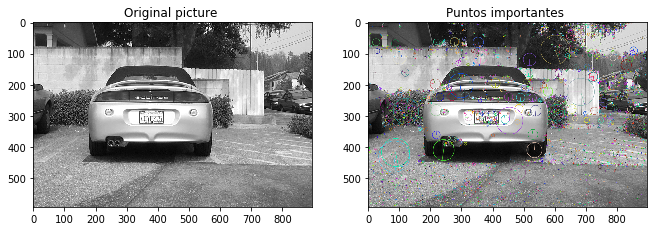

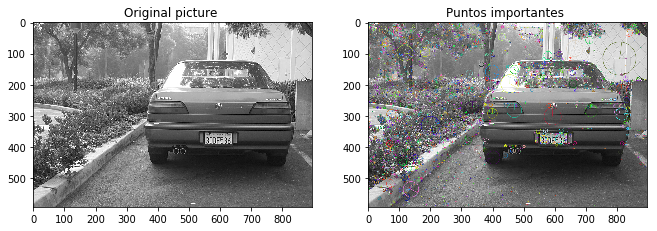

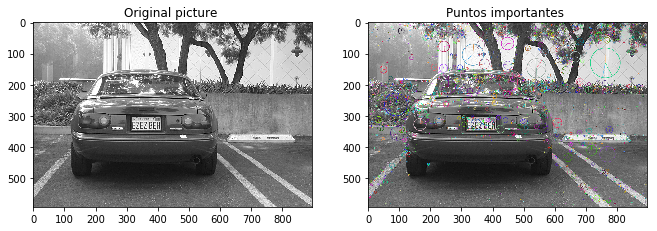

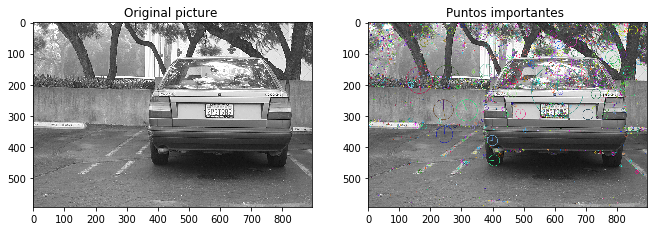

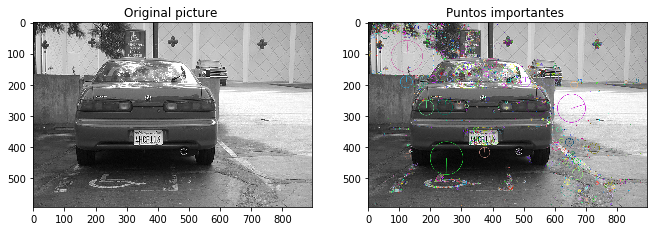

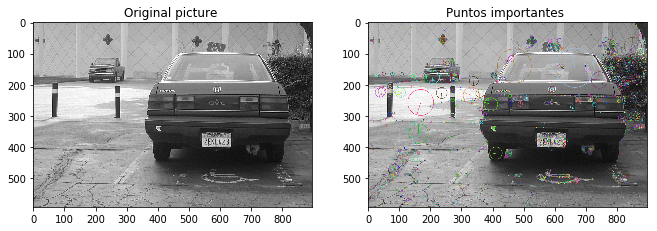

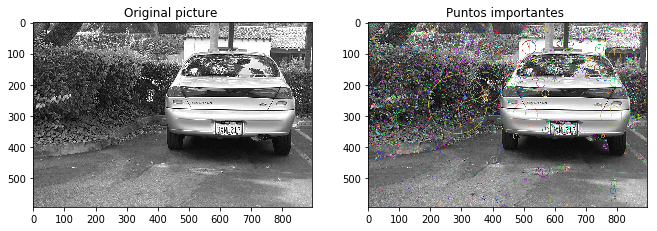

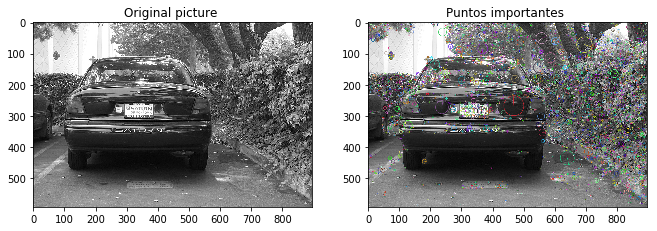

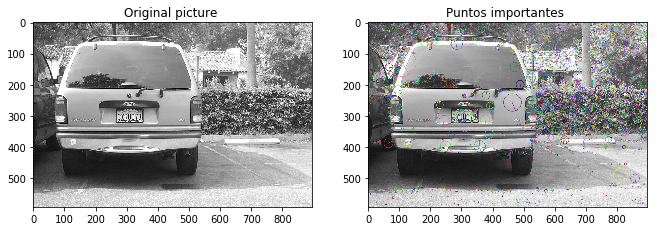

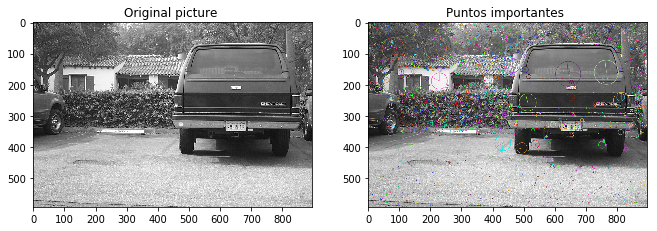

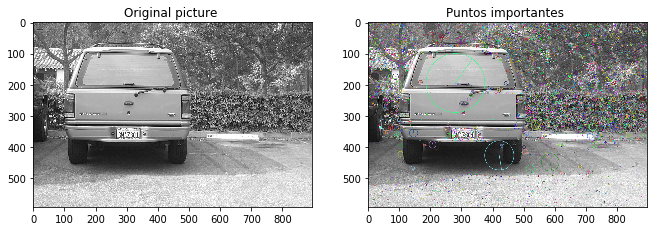

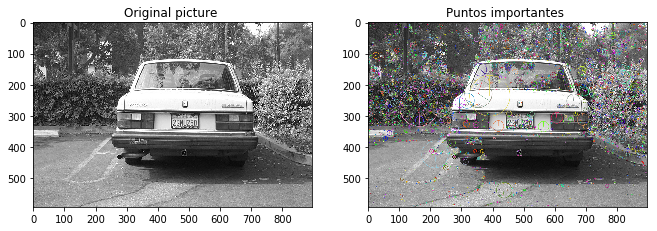

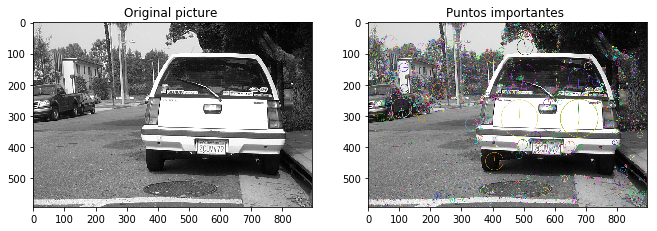

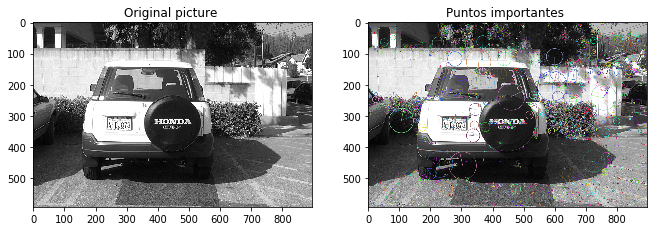

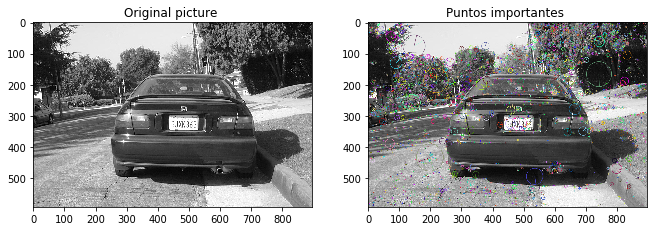

In [9]:
def sift(image):
    #Crear objeto SIFT y buscar los puntos importantes en la imagen
    sift = cv2.SIFT()
    kp = sift.detect(image,None)

    keypoints=cv2.drawKeypoints(image,kp,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    
    #Función para sacar los descriptores
    kp,des = sift.compute(image,kp)
    
    #Matriz con la ubicacion y tamaño de cada punto detectado
    points = np.zeros((3,len(kp)))
    for i in range(len(kp)):
        points[0][i] = kp[i].pt[0] 
        points[1][i] = kp[i].pt[1]
        points[2][i] = kp[i].size
    
    return [keypoints,des,points]

cars = [] # List with all the images read
m=1
for i,name in enumerate(filename):
    img = cv2.imread("cars/"+name,0);

    plt.figure(figsize=(17,17))
    plt.subplot(1,3,1)
    plt.title("Original picture ")
    plt.imshow(img, cmap='gray')
    

    [kpoints,siftdesc,points]=sift(img)
    
    #Crear archivo Json para almacenar los datos obtenidos
    jsonn = open("Descriptor_SIFT_carro"+str(m)+".json","w")
    data = {"Points":points.tolist(),"Descriptors": siftdesc.tolist()}
    json.dump(data,jsonn, sort_keys=True, indent=4)
    jsonn.close()
    print "Archivo de datos de carro "+str(m)+" creado"
    m=m+1

    plt.subplot(1,3,2)
    plt.title("Puntos importantes ")
    plt.imshow(kpoints)
    

<p>
    <em><strong>Funcionalidad del código: </strong></em>
    Una función debía extraer los puntos locales de interés y los descriptores
    por medio de la transformada SIFT. Para esto luego de leer la imagen, por
    medio de algunas funciones de Opencv se extraen directamente los puntos
    importantes para graficarlos y se muestra claramente la matriz con los 3
    elementos que corresponden a ubicaciones y tamaños de los mismos puntos.
    Estas mismas funciones obtienen los descriptores de SIFT, que por ser un
    conjunto de datos es mucho más practico guardarlos con formato json que
    intentar mostrarlos en una imagen. Por último, se grafican los puntos
    importantes de la imagen con los círculos indicadores de su tamaño y
    dirección.<strong><em></em></strong>
</p>
<p>
    <em><strong>Funciones empleadas y descripción: </strong></em>
</p>
<p>
    La función <strong>cv2.sift() </strong>construye un objeto sift. Con la
    función <strong>sift.detect() </strong>se pueden entonces detectar los
    puntos importantes del mismo, es en esta detección que se indica cual es la
    imagen a procesar como primer argumento.
</p>
<p>
    La función<strong> cv2.drawKeypoints()</strong> como su nombre lo indica
    sirve para graficar los puntos importantes con círculos que indican hasta
    el tamaño y la dirección de los mismos, esta última gracias al tercer
    argumento que es una bandera para indicar lo mismo.
</p>
<p>
    <strong>sift.compute() </strong>
    toma como primer argumento la imagen y como segundo argumento sus puntos
    importantes. Esta devuelve los descriptores sift que más adelante se
    requiere guardar en un archivo.
</p>